In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing functions for feature engineering
from config import BASE_PROCESSED_PATH
from features import add_rolling_stats, add_lag_features,scale_features,add_delta_features

In [3]:
#loading dataset
df = pd.read_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001.csv')
df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [4]:
df.shape

(20631, 27)

In [5]:
sensor_cols = [col for col in df.columns if 'sensor_' in col]
print(sensor_cols)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [6]:
#Dropping uninformative or flatline sensors
flat_sensors = [col for col in sensor_cols if df[col].std() < 0.1]
print("Flat sensors:",flat_sensors)

Flat sensors: ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_8', 'sensor_10', 'sensor_13', 'sensor_15', 'sensor_16', 'sensor_18', 'sensor_19']


In [7]:
df.drop(columns=flat_sensors,inplace=True)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,sensor_11,sensor_12,sensor_14,sensor_17,sensor_20,sensor_21,RUL
5950,30,158,0.0025,-0.0000,100.0,642.90,1594.27,1416.24,553.17,9057.01,47.61,521.57,8135.07,394,38.73,23.2411,36
5626,28,162,0.0003,-0.0000,100.0,643.83,1604.96,1430.24,551.63,9081.64,48.14,519.94,8154.59,396,38.26,23.2241,3
6794,34,183,-0.0041,0.0003,100.0,643.52,1604.74,1421.05,552.19,9134.80,47.92,520.44,8203.53,397,38.52,23.1732,12
5351,27,43,0.0002,-0.0004,100.0,642.84,1591.34,1401.74,553.68,9064.24,47.38,521.49,8149.36,394,38.79,23.3086,113
1032,5,186,0.0002,-0.0004,100.0,641.84,1589.40,1403.46,554.15,9081.96,47.47,521.63,8164.25,392,38.90,23.3886,83


In [8]:
#updating sensors by removing uninformative sensors
sensor_cols = [col for col in sensor_cols if col not in flat_sensors]
print(sensor_cols)

['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_14', 'sensor_17', 'sensor_20', 'sensor_21']


In [9]:
#rolling statistics
df = add_rolling_stats(df,sensor_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_roll_mean,sensor_12_roll_std,sensor_14_roll_mean,sensor_14_roll_std,sensor_17_roll_mean,sensor_17_roll_std,sensor_20_roll_mean,sensor_20_roll_std,sensor_21_roll_mean,sensor_21_roll_std
20017,97,130,-0.0041,-0.0002,100.0,642.53,1591.38,1409.07,554.10,9074.11,...,521.490,0.355668,8145.966,2.572242,393.2,0.447214,38.984,0.118448,23.35682,0.039857
6467,33,56,0.0008,-0.0002,100.0,641.62,1587.93,1403.26,554.42,9061.67,...,522.200,0.361732,8142.322,2.282273,391.8,0.447214,39.026,0.063875,23.37348,0.070661
14006,70,14,-0.0018,0.0004,100.0,642.68,1577.93,1406.18,553.60,9057.35,...,521.600,0.196596,8140.742,0.577122,392.2,1.095445,38.878,0.155628,23.32082,0.064036
7932,41,107,0.0036,-0.0000,100.0,642.40,1585.43,1406.36,553.75,9079.72,...,522.170,0.186682,8153.158,2.108333,392.2,1.643168,38.870,0.136382,23.37374,0.084144
8780,45,144,-0.0000,-0.0003,100.0,642.92,1595.77,1415.10,552.44,9087.42,...,520.588,0.275354,8162.946,3.310427,394.6,1.140175,38.630,0.121450,23.15278,0.043463


In [10]:
df.shape

(20631, 39)

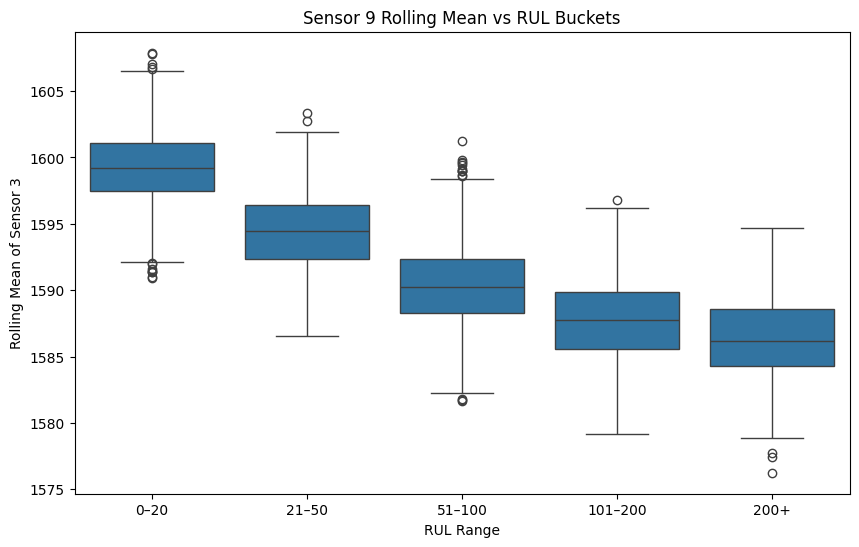

In [11]:
# Create RUL bins for comparison
df["RUL_bin"] = pd.cut(df["RUL"],\
    bins=[0, 20, 50, 100, 200, df["RUL"].max()], \
    labels=["0–20", "21–50", "51–100", "101–200", "200+"])

# Plot boxplot for one feature
plt.figure(figsize=(10, 6))
sns.boxplot(x="RUL_bin", y="sensor_3_roll_mean", data=df)
plt.title("Sensor 9 Rolling Mean vs RUL Buckets")
plt.ylabel("Rolling Mean of Sensor 3")
plt.xlabel("RUL Range")
plt.show()

In [12]:
#Lag features
df = add_lag_features(df,sensor_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_lag_1,sensor_12_lag_2,sensor_14_lag_1,sensor_14_lag_2,sensor_17_lag_1,sensor_17_lag_2,sensor_20_lag_1,sensor_20_lag_2,sensor_21_lag_1,sensor_21_lag_2
20063,97,176,0.0016,0.0003,100.0,643.67,1588.89,1413.01,552.28,9126.09,...,521.60,521.31,8191.69,8198.04,395.0,394.0,38.82,39.08,23.2674,23.2683
20252,99,7,-0.0032,-0.0001,100.0,642.02,1584.95,1407.88,553.74,9054.70,...,522.38,521.95,8140.25,8132.30,390.0,392.0,38.85,38.98,23.4206,23.3824
11524,58,133,-0.0029,-0.0001,100.0,643.11,1600.78,1422.72,552.71,9059.97,...,520.11,520.44,8131.71,8129.33,393.0,396.0,38.56,38.49,23.1201,23.1771
17547,86,208,-0.0003,0.0001,100.0,643.25,1596.17,1417.70,553.61,9068.05,...,521.38,521.57,8146.17,8146.67,393.0,393.0,38.54,38.79,23.3119,23.2514
3835,19,60,-0.0049,-0.0004,100.0,642.68,1587.38,1410.58,552.91,9041.58,...,521.04,520.88,8129.51,8121.49,394.0,395.0,38.87,38.87,23.3375,23.2729


In [13]:
df.shape

(20631, 62)

In [14]:
#normalizing the features
feature_cols = [col for col in df.columns if ('sensor_' in col) or ('roll' in col) or ('lag' in col)]
df = scale_features(df,feature_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_lag_1,sensor_12_lag_2,sensor_14_lag_1,sensor_14_lag_2,sensor_17_lag_1,sensor_17_lag_2,sensor_20_lag_1,sensor_20_lag_2,sensor_21_lag_1,sensor_21_lag_2
8863,46,69,-0.0004,0.0003,100.0,0.201807,0.219097,0.228899,0.716586,0.167818,...,0.746269,0.818763,0.236512,0.221487,0.166667,0.333333,0.658915,0.658915,0.803922,0.748274
17840,88,45,0.0006,0.0002,100.0,0.388554,0.281666,0.405807,0.684380,0.185901,...,0.678038,0.742004,0.257859,0.234271,0.333333,0.333333,0.682171,0.720930,0.752831,0.581607
12405,63,99,-0.0012,0.0004,100.0,0.590361,0.453237,0.491897,0.560386,0.199901,...,0.541578,0.560768,0.261417,0.276123,0.416667,0.333333,0.534884,0.581395,0.490886,0.529826
3438,17,134,-0.0027,-0.0003,100.0,0.493976,0.256159,0.327819,0.700483,0.227766,...,0.692964,0.742004,0.287330,0.266674,0.500000,0.500000,0.782946,0.744186,0.730461,0.702154
14723,73,173,-0.0003,-0.0002,100.0,0.388554,0.509483,0.555706,0.449275,0.093467,...,0.437100,0.349680,0.103016,0.117108,0.583333,0.583333,0.418605,0.286822,0.167771,0.432339


In [15]:
#adding delta feature 
df = add_delta_features(df,sensor_cols)
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_3_delta,sensor_4_delta,sensor_7_delta,sensor_9_delta,sensor_11_delta,sensor_12_delta,sensor_14_delta,sensor_17_delta,sensor_20_delta,sensor_21_delta
0,1,1,-0.0007,-0.0004,100.0,0.183735,0.406802,0.309757,0.726248,0.109755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,0.283133,0.453019,0.352633,0.628019,0.100242,...,0.046218,0.042876,-0.098229,-0.009513,0.011905,0.132196,-0.036794,0.000000,-0.046512,0.006352
2,1,3,-0.0043,0.0003,100.0,0.343373,0.369523,0.370527,0.710145,0.140043,...,-0.083497,0.017893,0.082126,0.039801,-0.130952,0.029851,0.008979,-0.166667,-0.038760,-0.109638
3,1,4,0.0007,0.0000,100.0,0.343373,0.256159,0.331195,0.740741,0.124518,...,-0.113364,-0.039332,0.030596,-0.015525,-0.083333,0.093817,0.003096,0.166667,-0.054264,0.041011
4,1,5,-0.0019,-0.0002,100.0,0.349398,0.257467,0.404625,0.668277,0.149960,...,0.001308,0.073430,-0.072464,0.025442,0.089286,-0.142857,-0.000155,0.083333,0.015504,0.042115


In [20]:
df.to_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001_engineered.csv', index=False)